In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
!pwd

/Users/jeremypalmerio/Repos/CasualPresentation


In [7]:
fname = 'earnings/close_college.dta'
df = pd.read_stata(fname)

In [26]:
df

,nearc4,educ,black,smsa,south,married,exper,lwage
0,0,7,1,1,0,1.0,16,6.306275
1,0,12,0,1,0,1.0,9,6.175867
2,0,12,0,1,0,1.0,16,6.580639
3,1,11,0,1,0,1.0,10,5.521461
4,1,12,0,1,0,1.0,16,6.591674
...,...,...,...,...,...,...,...,...
3005,1,12,0,0,1,1.0,7,5.814130
3006,1,13,0,1,1,1.0,15,6.175867
3007,1,12,0,0,1,1.0,6,6.214608
3008,1,12,0,0,1,1.0,13,6.569481


# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nearc4   3010 non-null   int8   
 1   educ     3010 non-null   int8   
 2   black    3010 non-null   int8   
 3   smsa     3010 non-null   int8   
 4   south    3010 non-null   int8   
 5   married  3003 non-null   float64
 6   exper    3010 non-null   int8   
 7   lwage    3010 non-null   float32
dtypes: float32(1), float64(1), int8(6)
memory usage: 53.0 KB


In [9]:
df.describe()

,nearc4,educ,black,smsa,south,married,exper,lwage
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3003.000000,3010.000000,3010.000000
mean,0.682060,13.263455,0.233555,0.712957,0.403654,2.271395,8.856146,6.261832
std,0.465753,2.676913,0.423162,0.452457,0.490711,2.066823,4.141672,0.443797
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.605170
25%,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,6.000000,5.976985
50%,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000,8.000000,6.286928
75%,1.000000,16.000000,0.000000,1.000000,1.000000,4.000000,11.000000,6.563503
max,1.000000,18.000000,1.000000,1.000000,1.000000,6.000000,23.000000,7.784889


In [12]:
df.isna().sum()
df.dropna(inplace=True)

In [14]:
df = df.drop(['Happiness Rank', 'Country', 'Region'], axis=1)

<Axes: >

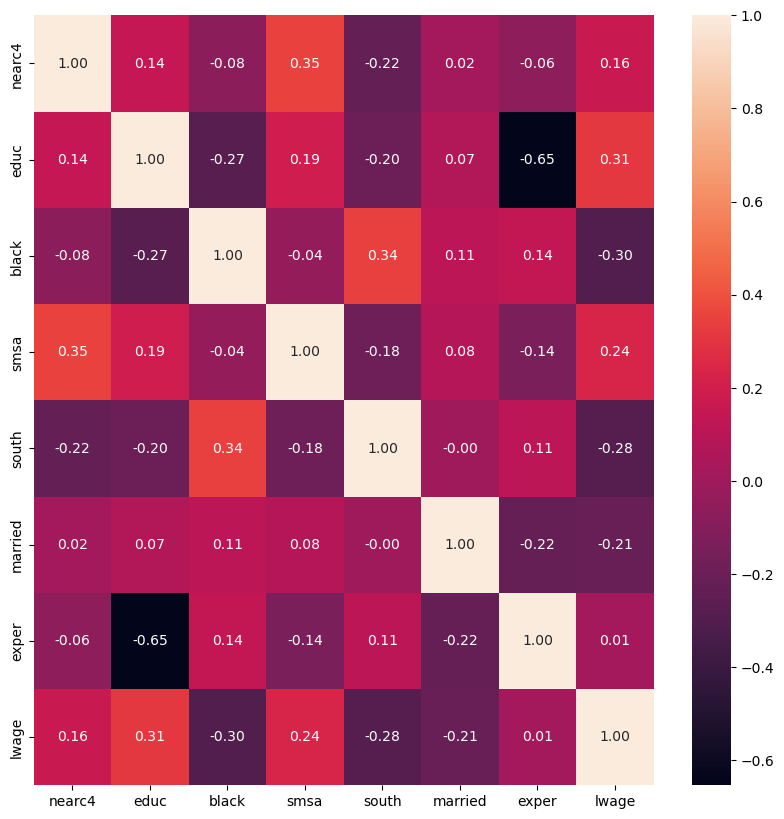

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)

### Making the Graph 


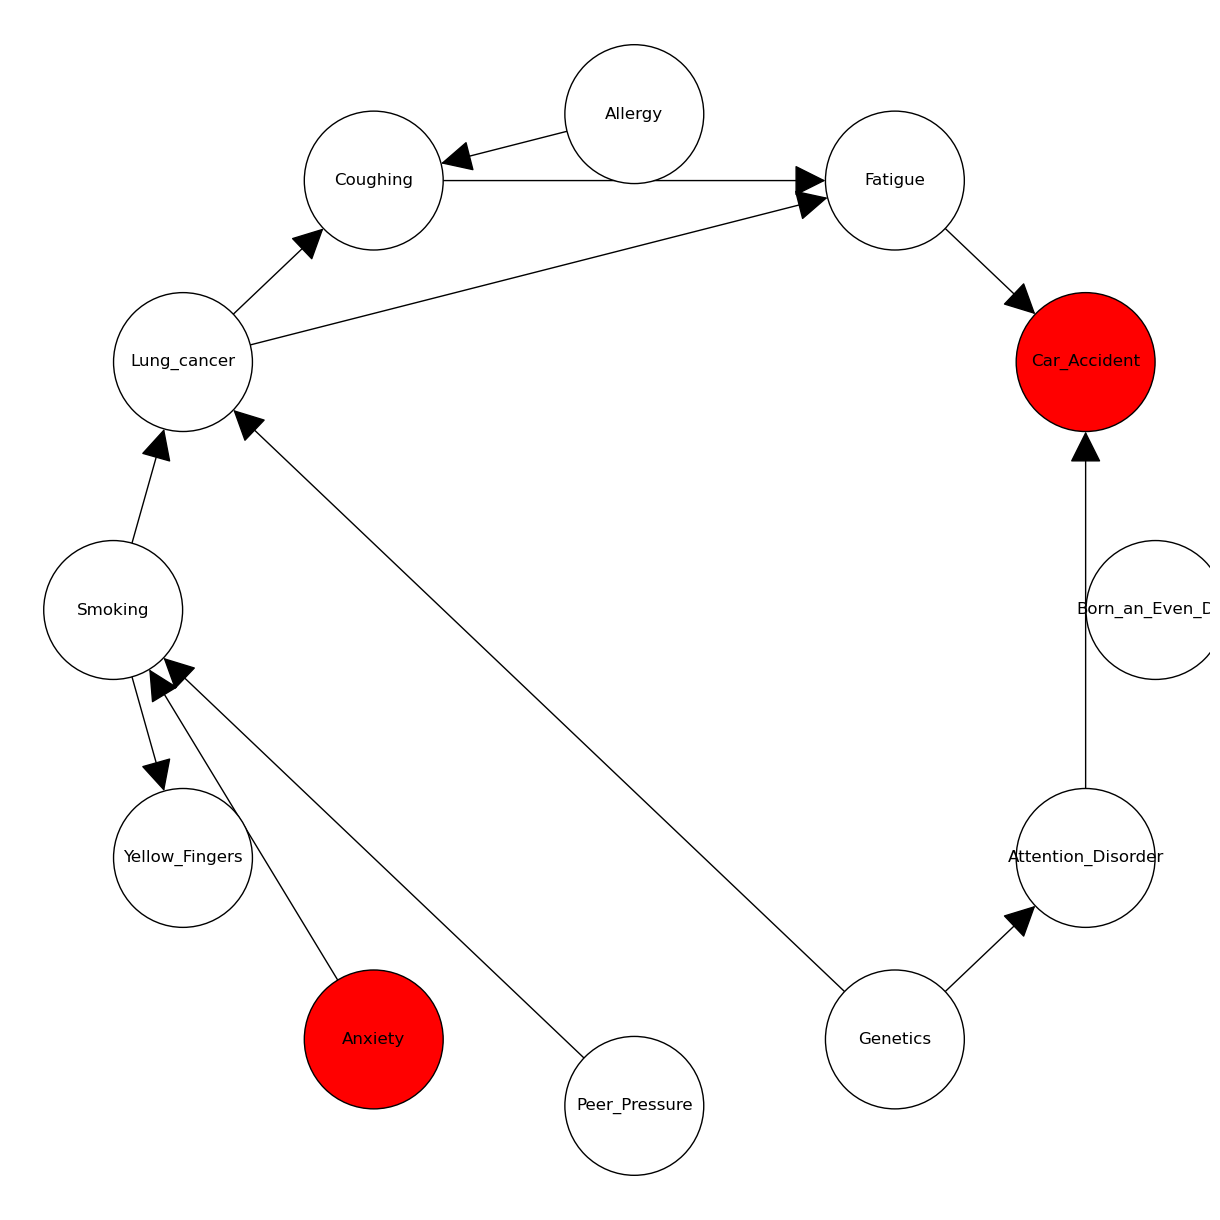

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(df.columns)
G.add_edges_from([('Anxiety', 'Smoking'),
                   ('Peer_Pressure', 'Smoking'),
                   ('Smoking', 'Yellow_Fingers'),
                   ('Smoking', 'Lung_cancer'),
                   ('Genetics', 'Lung_cancer'),
                   ('Genetics', 'Attention_Disorder'),
                   ('Lung_cancer', 'Fatigue'),
                   ('Lung_cancer', 'Coughing'),
                   ('Allergy', 'Coughing'),
                   ('Coughing', 'Fatigue'),
                   ('Attention_Disorder', 'Car_Accident'),
                   ('Fatigue', 'Car_Accident'),

                     ])
plt.figure(figsize=(12,12))

nx.draw_shell(G, with_labels=True, node_color = ['w', 'w', 'r', 'w', 'w', 'w', 'w', 'r', 'w', 'w', 'w', 'w'], arrowsize = 50, node_size = 10000, edgecolors='black', font_size=12)

In [ ]:
nx.write_gml(G, 'LUCAS.gml')

## Estimands

In [19]:
from dowhy.causal_identifier import backdoor
from dowhy import CausalModel

In [ ]:
# a utility function to parse the .gml file to string 
# From tutorial 3
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

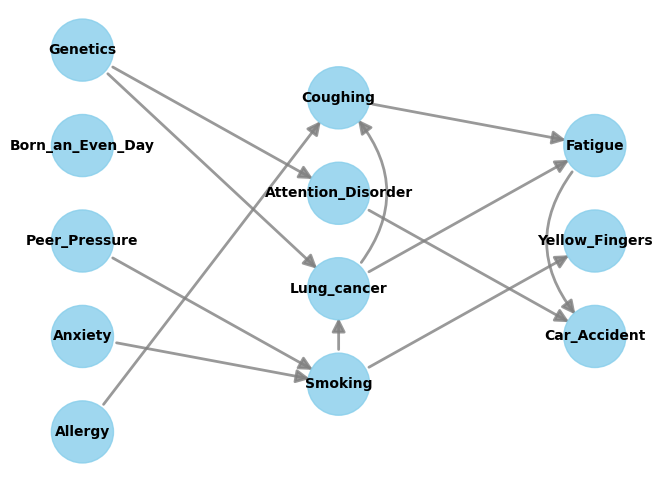

In [34]:
graph_str = gml_to_string('LUCAS.gml')

model=CausalModel(
    data = df,
    treatment='Anxiety',
    outcome='Car_Accident',
    graph=graph_str
)
model.view_model()

In [35]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡            d                                ∂                               ↪
E⎢──────────────────────────(Car_Accident)⋅──────────([Smoking  Yellow_Fingers ↪
 ⎣d[Smoking  Yellow_Fingers]               ∂[Anxiety]                          ↪

↪   ⎤
↪ ])⎥
↪   ⎦
Estimand assumption 1, Full-mediation: Smoking,Yellow_Fingers intercepts (blocks) all directed paths from Anxiety to C,a,r,_,A,c,c,i,d,e,n,t.
Estimand assumption 2, First-stage-unconfoundedness: If U→{Anxiety} and U→{Smoking,Yellow_Fingers} then P(Smoking,Yellow_Fingers|Anxiety,U) = 

In [36]:
identifier = model.identifier
identifier.identify_backdoor(model._graph._graph, model._treatment, model._outcome, list(model._graph.get_all_nodes(include_unobserved=False)))

[{'backdoor_set': set()},
 {'backdoor_set': ('Peer_Pressure',
   'Allergy',
   'Genetics',
   'Attention_Disorder')},
 {'backdoor_set': ('Peer_Pressure',)},
 {'backdoor_set': ('Allergy',)},
 {'backdoor_set': ('Genetics',)},
 {'backdoor_set': ('Attention_Disorder',)}]

## Estimating Causal Effect

In [47]:
from sklearn.linear_model import LinearRegression

In [52]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

## Realized estimand
b: Car_Accident~Anxiety+Anxiety*Peer_Pressure+Anxiety*Allergy+Anxiety*Genetics+Anxiety*Attention_Disorder
Target units: 

## Estimate
Mean value: 0.029664433911190446
### Conditional Estimates
__categorical__Peer_Pressure  __categorical__Allergy  __categorical__Genetics  __categorical__Attention_Disorder
(-0.001, 1.0]                 (-0.001, 1.0]           (-0.001, 1.0]            (-0.001, 1.0]                        0.029664
dtype: float64
Causal Estimate is 0.029664433911190446


/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprec

In [57]:
# using the backdoor adjustment set and propensity score stratification
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None


## Causal Discovery 

### PC algorithm 

In [28]:
from pgmpy.estimators import PC, ExpertKnowledge


In [30]:
alpha = 0.05
pc = PC(df)
pc_graph = pc.estimate(ci_test='pillai', return_type='cpdag', significance_level=alpha)


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'nearc4': 'N', 'educ': 'N', 'black': 'N', 'smsa': 'N', 'south': 'N', 'married': 'N', 'exper': 'N', 'lwage': 'N'}


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


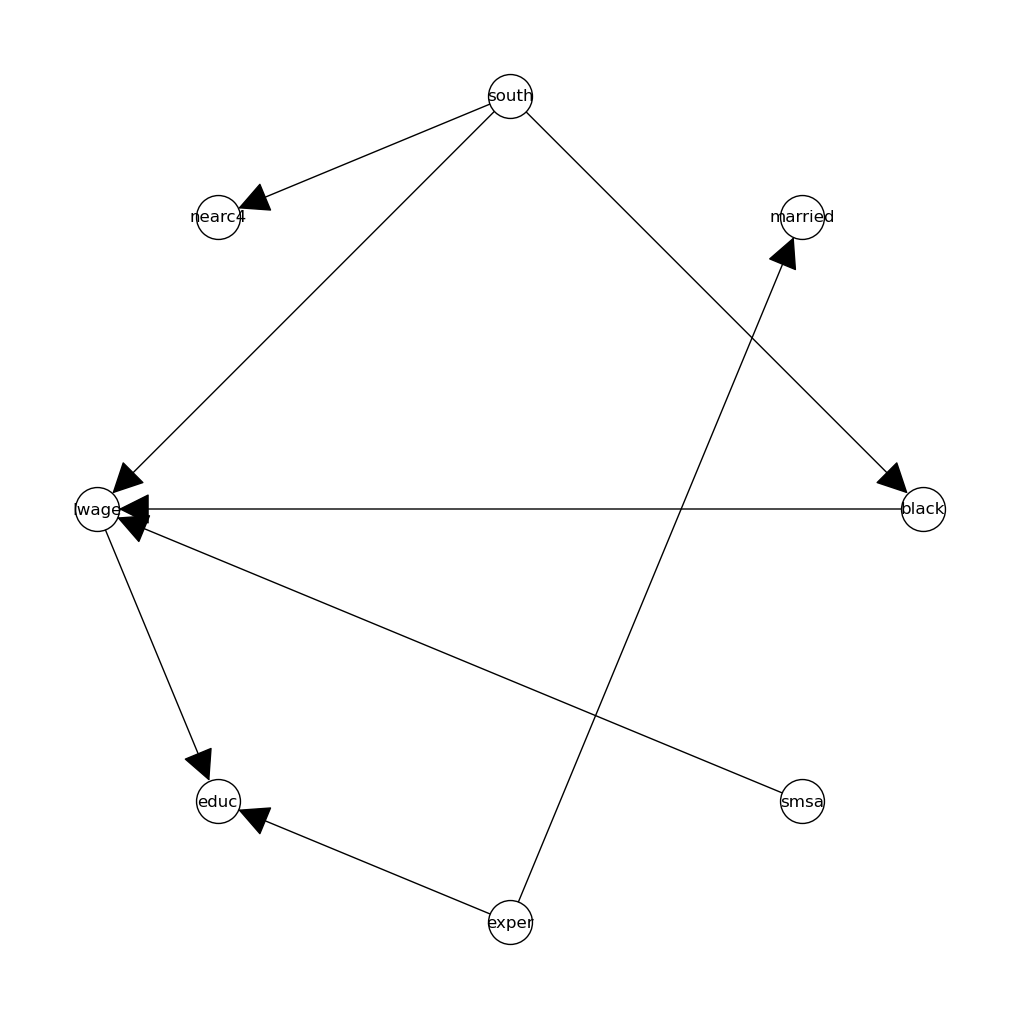

In [31]:
# Visualize the graph
plt.figure(figsize=(10,10))

colors = ['red'  if (y,x) in pc_graph.edges() else 'black' for (x,y) in pc_graph.edges()]
nx.draw_shell(pc_graph, with_labels=True, node_size=1000, font_size=12, arrowsize=50, node_color='w', edgecolors ='black', edge_color=colors)


In [17]:
df.columns

Index(['nearc4', 'educ', 'black', 'smsa', 'south', 'married', 'exper',
       'lwage'],
      dtype='object')

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['nearc4'] on outcome ['lwage']
INFO:dowhy.utils.plotting:Pygraphviz installation not found, falling back to networkx plotting. For better looking plots, consider installing pygraphviz. Note This requires both the Python pygraphviz package (``pip install pygraphviz``) and the shared system library (e.g. ``brew install graphviz`` or ``apt-get install graphviz``)


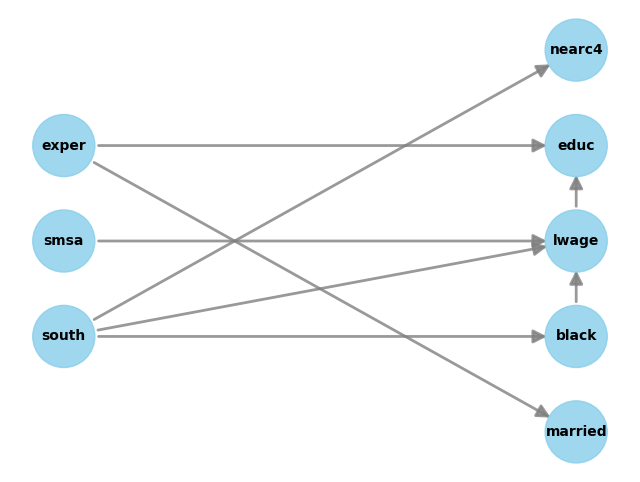

INFO:dowhy.causal_model:linear_regression
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


No directed path from ['nearc4'] to ['lwage'] in the causal graph.
Causal effect is zero.
Causal Estimate is 0


In [33]:
gml = ''.join(nx.generate_gml(pc_graph))
model = CausalModel(
        data = df,
        treatment='nearc4',
        outcome='lwage',
        graph=gml)
model.view_model()

identified_estimand = model.identify_effect()
print(identified_estimand)

estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

### GES 

In [28]:
from pgmpy.estimators import GES as pgmpy_ges
from pgmpy.estimators import ExhaustiveSearch, HillClimbSearch, BDeu, BIC


ges_graph_pgmpy = pgmpy_ges(df).estimate(scoring_method='pearsonr')
colors = ['red'  if (y,x) in ges_graph_pgmpy.edges() else 'black' for (x,y) in ges_graph_pgmpy.edges()]

plt.figure(figsize=(12,12))
nx.draw_shell(ges_graph_pgmpy, with_labels=True, node_size=500, node_color='w', edgecolors ='black', edge_color=colors)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Happiness Score': 'N', 'Standard Error': 'N', 'Economy (GDP per Capita)': 'N', 'Family': 'N', 'Health (Life Expectancy)': 'N', 'Freedom': 'N', 'Trust (Government Corruption)': 'N', 'Generosity': 'N', 'Dystopia Residual': 'N'}


ValueError: Unknown scoring method. Please refer documentation for a list of supported score metrics.